# Milestone 1

```
Nama    : Aziz Dharmawan Apray
FTDS Batch 008
```

## Description

### Objective

```
Membuat model supervised learning untuk memprediksi apakah nasabah telah berlangganan deposito berjangka.
```


### Problem Statement

```
1. Mempersiapkan data untuk digunakan dalam model supervised learning
2. Mengimplementasikan supervised learning dengan data yang diberikan
3. Melakukan evaluasi model
4. Melakukan model tuning
```

## Working Area

### 1 - Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### 2 - Data Loading

In [2]:
# Load Dataset

df = pd.read_csv('bank-additional-full.csv', sep=';')
df_ori = df.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Check the dataset shapes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Get numerical and categorical column

num_col = df.select_dtypes(include=np.number).columns.tolist()
cat_col = df.select_dtypes(include=('object')).columns.tolist()

print('Numerical Columns :', num_col)
print('')
print('Categorical Columns :', cat_col)

Numerical Columns : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical Columns : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [5]:
# Check Descriptive Statistics of dataset

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Based on this Descriptive Statistics, there are some weird number (999) appers in pdays colomn. This column explain number of days that passed by after the client was last contacted from a previous campaign.

The `999` values means client was not previously contacted.

In [6]:
# Count the `999` values

df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

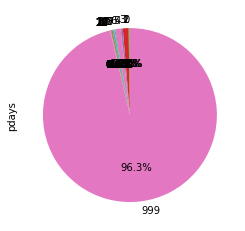

In [7]:
# Visualize

df['pdays'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.show()

96.3 % of total client was not previously contacted.

In [8]:
# Get unique values in each categorical columns

for col in cat_col:
    print('Column :', col)
    print(df[col].sort_values(ascending=True).unique())
    print('-'*15)
    print('')

Column : job
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
---------------

Column : marital
['divorced' 'married' 'single' 'unknown']
---------------

Column : education
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
---------------

Column : default
['no' 'unknown' 'yes']
---------------

Column : housing
['no' 'unknown' 'yes']
---------------

Column : loan
['no' 'unknown' 'yes']
---------------

Column : contact
['cellular' 'telephone']
---------------

Column : month
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
---------------

Column : day_of_week
['fri' 'mon' 'thu' 'tue' 'wed']
---------------

Column : poutcome
['failure' 'nonexistent' 'success']
---------------

Column : y
['no' 'yes']
---------------



In [9]:
# Check value distribution on target feature

df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Imbalance target feature

### 3 - EDA

In [10]:
df['age'].sort_index().unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

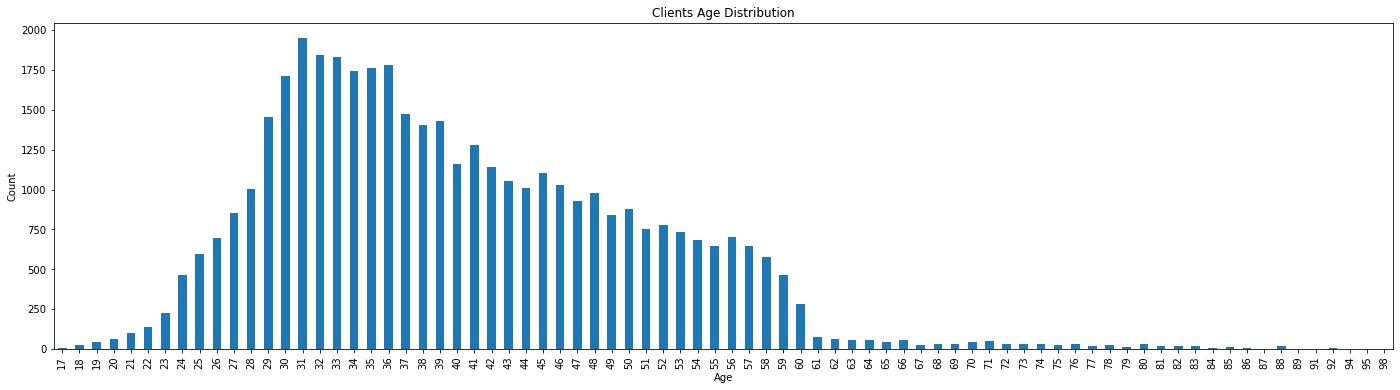

In [11]:
plt.figure(figsize=(24,6))
plt.title('Clients Age Distribution')
df['age'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This graph shows that most of the clients are in productive age which is dominated by young adults.

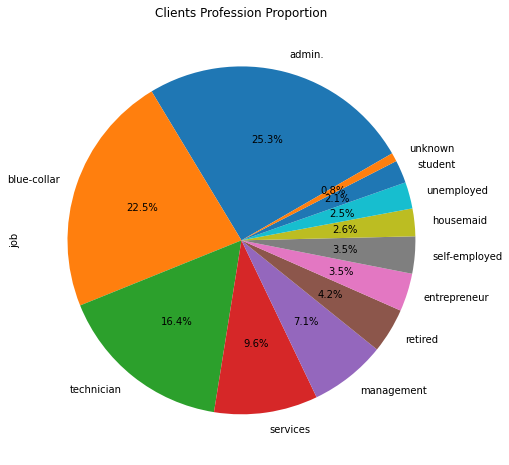

In [12]:
plt.figure(figsize=(20,8))
plt.title('Clients Profession Proportion')
df['job'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=30)
plt.show()

Top 5 client's profession:
1. Admin        | 25.3%
2. Blue-collar  | 22.5%
3. Technician   | 16.4%
4. Services     |  9.6%
5. Management   |  7.1%

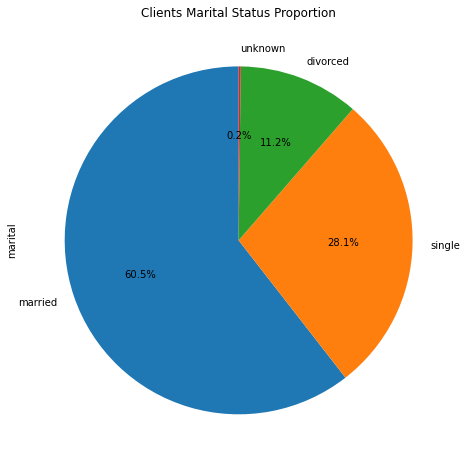

In [13]:
plt.figure(figsize=(20,8))
plt.title('Clients Marital Status Proportion')
df['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.show()

### 4 - Data Preprocessing

#### 4.1 - Data Inference

In [14]:
# Get data for model inference

df_inf = df.sample(10, random_state=0)
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
15500,39,blue-collar,married,basic.9y,no,yes,no,cellular,jul,fri,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes
29034,55,blue-collar,married,basic.4y,no,yes,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
11199,39,blue-collar,married,basic.9y,unknown,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
22247,56,self-employed,married,basic.9y,no,yes,no,cellular,aug,thu,...,7,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
27180,49,blue-collar,married,basic.9y,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
33831,43,blue-collar,married,basic.4y,no,no,yes,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
961,58,unknown,married,unknown,unknown,no,no,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
10746,28,services,single,high.school,no,no,no,telephone,jun,tue,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
15195,24,technician,single,basic.6y,no,yes,no,telephone,jul,thu,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,yes
34319,34,admin.,married,high.school,no,no,no,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no


In [15]:
# Remove inference-set from dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [16]:
# Reset index

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

#### 4.2 - Splitting Dataset

In [17]:
# Define `X` and `y`

X = df_train_test.drop(['y'], axis=1)
y = df_train_test['y']

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (41178, 20)
y shape: (41178,)


In [18]:
# Split Dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('')
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (32942, 20)
y_train shape: (32942,)

X_test shape: (8236, 20)
y_test shape: (8236,)


#### 4.3 - Check Distribution

In [19]:
# Distribution check

X_train_skewness = pd.DataFrame(X_train.skew(axis=0), columns=['skewness_value']).reset_index()
X_train_skewness.rename(columns={'index': 'column'}, inplace=True)
X_train_skewness['distribution'] = np.where(
    (X_train_skewness['skewness_value'] < 0.5) &
    (X_train_skewness['skewness_value'] > -0.5), 'normal','skewed')

X_train_skewness

C:\Users\ACER\AppData\Local\Temp/ipykernel_12084/3770554608.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train_skewness = pd.DataFrame(X_train.skew(axis=0), columns=['skewness_value']).reset_index()


,column,skewness_value,distribution
0,age,0.768678,skewed
1,duration,3.283284,skewed
2,campaign,4.841990,skewed
3,pdays,-4.944423,skewed
4,previous,3.809680,skewed
5,emp.var.rate,-0.720387,skewed
6,cons.price.idx,-0.228201,normal
7,cons.conf.idx,0.298101,normal
8,euribor3m,-0.707464,skewed
9,nr.employed,-1.043083,skewed


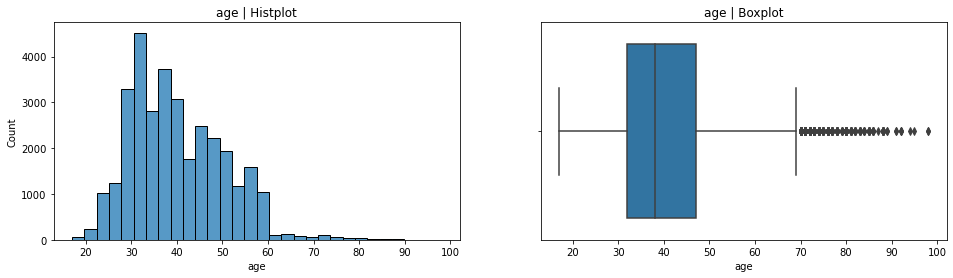

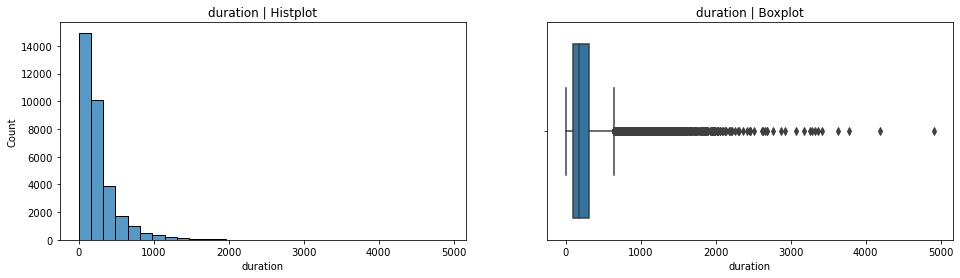

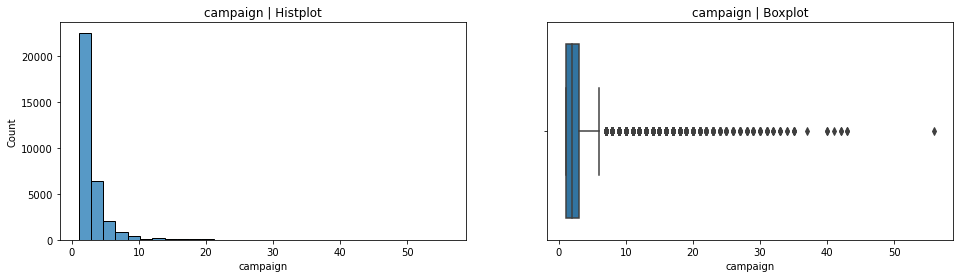

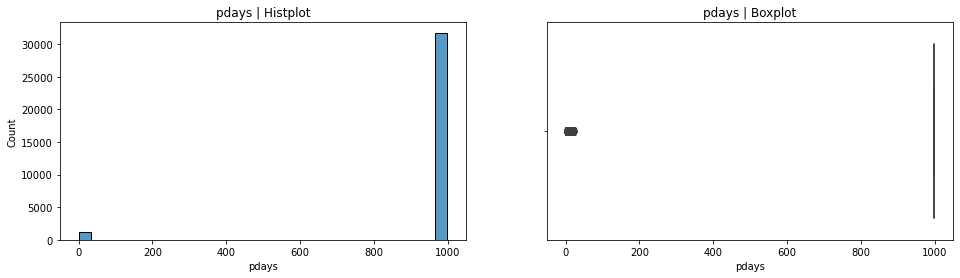

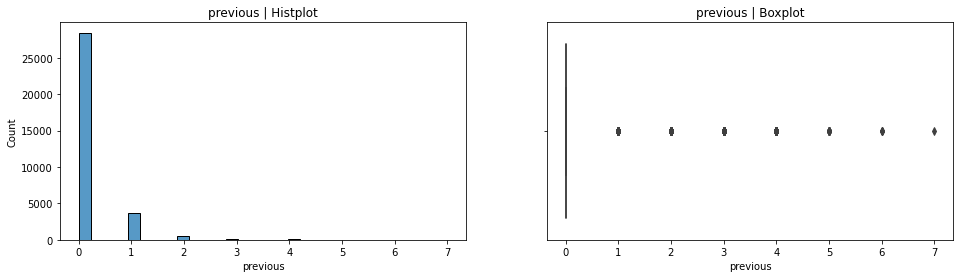

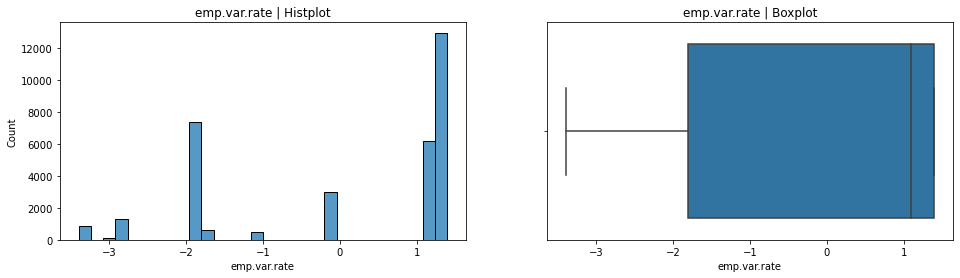

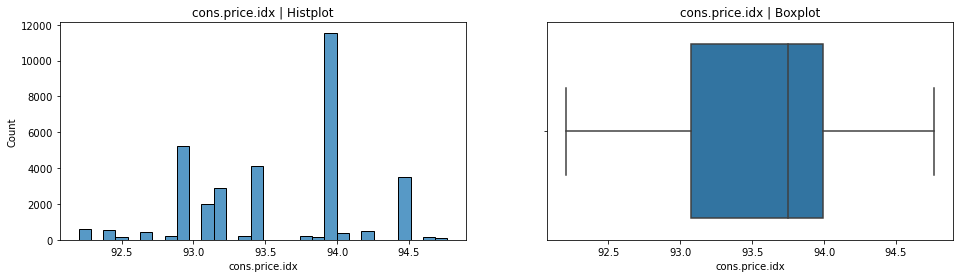

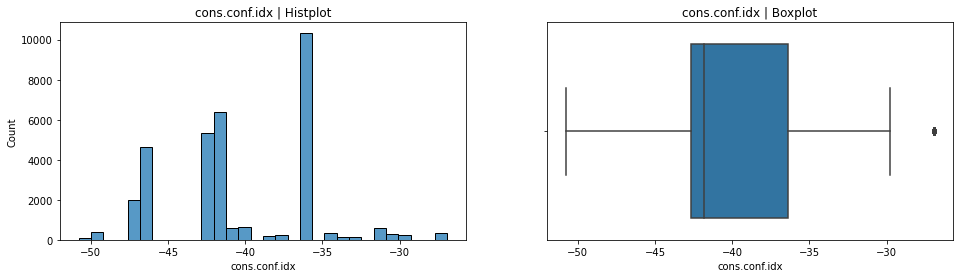

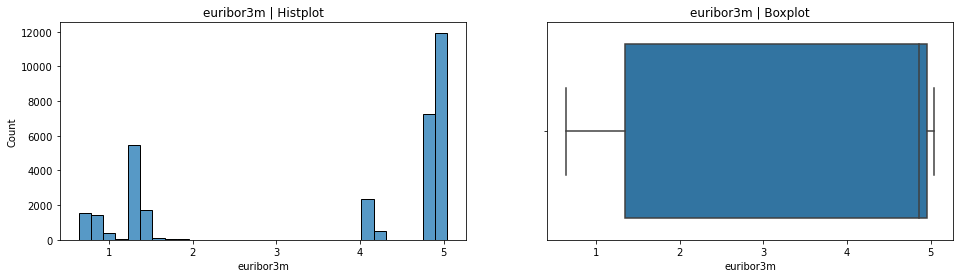

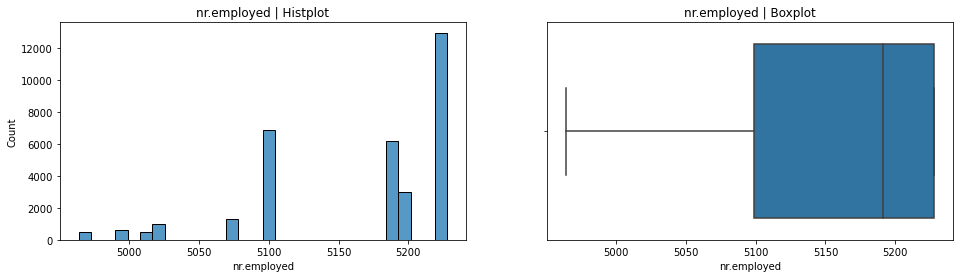

In [20]:
# Visualization of column `distribution`

for col in num_col:
    fig, ax = plt.subplots(1, 2, figsize=(16,4))

    sns.histplot(x=X_train[col], ax=ax[0], bins=30)
    sns.boxplot(x=X_train[col], ax=ax[1])
    
    ax[0].set_title(col + ' | Histplot')
    ax[1].set_title(col + ' | Boxplot')

    plt.show()

From the boxplot graph, we can diagnose clearly there are some outliers in column `age, duration, campaign, pdays, and previous`.

#### 4.3 - Checking Outlier


##### Function to get Upper & Lower Boundary 

In [21]:
# Function to get lower and upper boundaries of normal distribution data
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

# Function to get lower and upper boundaries of skew distribution data
def find_skewed_boundaries(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

##### Get Upper & Lower Boundary

In [22]:
# Prepare the empty column with ethe empty list

X_train_outlier = {
    'column':[],
    'upper_boundary':[],
    'lower_boundary':[],
    'total_right_tail':[],
    'total_left_tail':[],
    'total_right_tail_percent':[],
    'total_left_tail_percent':[],
    'total_outlier':[],
    'total_outlier_percent':[]
}

# Get upper and lower boundary from each column 

for row in X_train_skewness.index.tolist():
    col = X_train_skewness.iloc[row]['column']
    dist = X_train_skewness.iloc[row]['distribution']
    if dist == 'normal':
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, col)
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, col)
    
    total_right_tail = len(X_train[X_train[col] > upper_boundary])
    total_left_tail = len(X_train[X_train[col] < lower_boundary])
    total_right_tail_percent = total_right_tail / len(X_train) * 100
    total_left_tail_percent = total_left_tail / len(X_train) * 100
    total_outlier = total_right_tail + total_left_tail
    total_outlier_percent = total_right_tail_percent + total_left_tail_percent

    X_train_outlier['column'].append(col)
    X_train_outlier['upper_boundary'].append(upper_boundary)
    X_train_outlier['lower_boundary'].append(lower_boundary)
    X_train_outlier['total_right_tail'].append(total_right_tail)
    X_train_outlier['total_left_tail'].append(total_left_tail)
    X_train_outlier['total_right_tail_percent'].append(total_right_tail_percent)
    X_train_outlier['total_left_tail_percent'].append(total_left_tail_percent)
    X_train_outlier['total_outlier'].append(total_outlier)
    X_train_outlier['total_outlier_percent'].append(total_outlier_percent)

# Convert to Dataframe

X_train_outlier = pd.DataFrame(X_train_outlier)
X_train_outlier

,column,upper_boundary,lower_boundary,total_right_tail,total_left_tail,total_right_tail_percent,total_left_tail_percent,total_outlier,total_outlier_percent
0,age,69.500000,9.500000,360,0,1.092830,0.000000,360,1.092830
1,duration,644.500000,-223.500000,2383,0,7.233926,0.000000,2383,7.233926
2,campaign,6.000000,-2.000000,1925,0,5.843604,0.000000,1925,5.843604
3,pdays,999.000000,999.000000,0,1202,0.000000,3.648837,1202,3.648837
4,previous,0.000000,0.000000,4514,0,13.702872,0.000000,4514,13.702872
5,emp.var.rate,6.200000,-6.600000,0,0,0.000000,0.000000,0,0.000000
6,cons.price.idx,95.308134,91.842028,0,0,0.000000,0.000000,0,0.000000
7,cons.conf.idx,-26.669771,-54.358953,0,0,0.000000,0.000000,0,0.000000
8,euribor3m,10.386500,-4.081500,0,0,0.000000,0.000000,0,0.000000
9,nr.employed,5421.600000,4905.600000,0,0,0.000000,0.000000,0,0.000000


In [23]:
# Merge `X_train_skewness` and `X_train_outlier`

pd.merge(X_train_skewness, X_train_outlier, on='column')

,column,skewness_value,distribution,upper_boundary,lower_boundary,total_right_tail,total_left_tail,total_right_tail_percent,total_left_tail_percent,total_outlier,total_outlier_percent
0,age,0.768678,skewed,69.500000,9.500000,360,0,1.092830,0.000000,360,1.092830
1,duration,3.283284,skewed,644.500000,-223.500000,2383,0,7.233926,0.000000,2383,7.233926
2,campaign,4.841990,skewed,6.000000,-2.000000,1925,0,5.843604,0.000000,1925,5.843604
3,pdays,-4.944423,skewed,999.000000,999.000000,0,1202,0.000000,3.648837,1202,3.648837
4,previous,3.809680,skewed,0.000000,0.000000,4514,0,13.702872,0.000000,4514,13.702872
5,emp.var.rate,-0.720387,skewed,6.200000,-6.600000,0,0,0.000000,0.000000,0,0.000000
6,cons.price.idx,-0.228201,normal,95.308134,91.842028,0,0,0.000000,0.000000,0,0.000000
7,cons.conf.idx,0.298101,normal,-26.669771,-54.358953,0,0,0.000000,0.000000,0,0.000000
8,euribor3m,-0.707464,skewed,10.386500,-4.081500,0,0,0.000000,0.000000,0,0.000000
9,nr.employed,-1.043083,skewed,5421.600000,4905.600000,0,0,0.000000,0.000000,0,0.000000


This dataframe describe clearly about the total outlier in percentage and help to analize how to treat the outliers.

##### Handling Outliers

In [24]:
# Outliers < 5% (trimming)
from feature_engine.outliers import OutlierTrimmer

print('X_train - Before Handling :', X_train.shape)

## Skew
trim = OutlierTrimmer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=['age','pdays'],
                        missing_values='ignore'
                        )

## Normal
#trim = OutlierTrimmer(capping_method='gaussian',
#                        tail='both',
#                        fold=3,
#                        variables=[],
#                        missing_values='ignore'
#                        )

# Fit the capper
X_train_trim = trim.fit_transform(X_train)

print('X_train - After Handling :', X_train_trim.shape)

X_train - Before Handling : (32942, 20)
X_train - After Handling : (31451, 20)


In [25]:
# Outliers 5 % - 15 % (capping)
from feature_engine.outliers import Winsorizer

print('X_train - Before Handling :', X_train_trim.shape)

## Skew
capper = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=['duration','campaign','previous'],
                        missing_values='ignore'
                        )

## Normal
#capper = Winsorizer       (capping_method='gaussian',
#                        tail='both',
#                        fold=3,
#                        variables=[],
#                        missing_values='ignore'
#                        )

# Fit the capper
X_train_trim_cap = trim.fit_transform(X_train_trim)

print('X_train - After Handling :', X_train_trim_cap.shape)

X_train - Before Handling : (31451, 20)
X_train - After Handling : (31451, 20)


In [26]:
# Adjust the index for y_train

y_train_trim_cap = y_train.drop(y_train.index.difference(X_train_trim_cap.index))
y_train_trim_cap.shape

(31451,)

In [27]:
# Reset Index

X_train_trim_cap.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train_trim_cap.reset_index(drop=True, inplace=True)    # y_train_trim (?)
y_test.reset_index(drop=True, inplace=True)

#### 4.5 - Checking Missing Values

In [28]:
# Check how many missing values in X_train

X_train_trim_cap_mv = pd.DataFrame(X_train_trim_cap.isna().sum(), columns=['count'])
X_train_trim_cap_mv_percent = pd.DataFrame(X_train_trim_cap.isna().sum()*100/len(X_train_trim_cap), columns=['count_percentage'])
X_train_trim_cap_mv = pd.concat([X_train_trim_cap_mv, X_train_trim_cap_mv_percent], axis=1).reset_index()
X_train_trim_cap_mv.rename(columns={'index': 'column'}, inplace=True)
X_train_trim_cap_mv

,column,count,count_percentage
0,age,0,0.0
1,job,0,0.0
2,marital,0,0.0
3,education,0,0.0
4,default,0,0.0
5,housing,0,0.0
6,loan,0,0.0
7,contact,0,0.0
8,month,0,0.0
9,day_of_week,0,0.0


No missing values detected in X_train.

In [29]:
# Check how many missing values in X_test

X_test_mv = pd.DataFrame(X_test.isna().sum(), columns=['count'])
X_test_mv_percent = pd.DataFrame(X_test.isna().sum()*100/len(X_test), columns=['count_percentage'])
X_test_mv = pd.concat([X_test_mv, X_test_mv_percent], axis=1).reset_index()
X_test_mv.rename(columns={'index': 'column'}, inplace=True)
X_test_mv

,column,count,count_percentage
0,age,0,0.0
1,job,0,0.0
2,marital,0,0.0
3,education,0,0.0
4,default,0,0.0
5,housing,0,0.0
6,loan,0,0.0
7,contact,0,0.0
8,month,0,0.0
9,day_of_week,0,0.0


No missing values detected in X_test.

In [30]:
y_train_trim_cap.isna().sum()

0

In [31]:
y_test.isna().sum()

0

No missing values detected in both y_train and y_test.

### 5 - Feature Selection

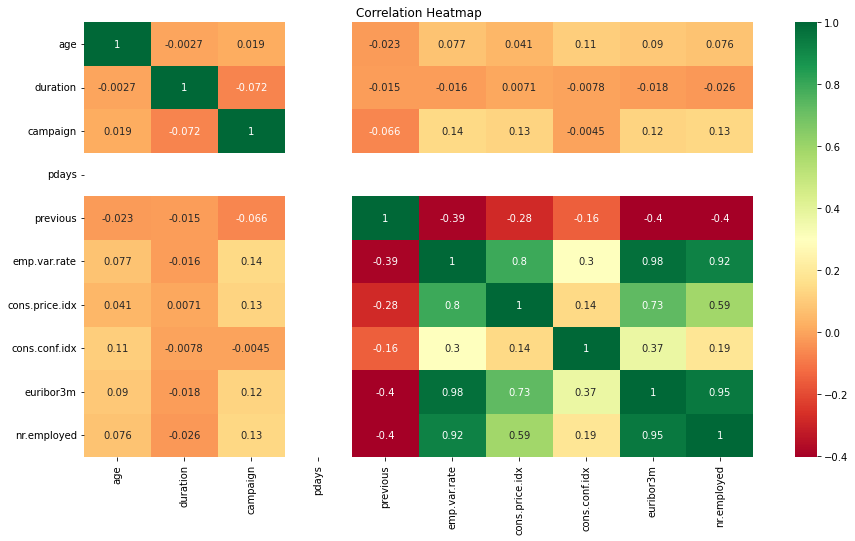

In [32]:
# Feature Selection

plt.figure(figsize=(15,8))
heatmap = sns.heatmap(X_train_trim_cap.corr(), cmap='RdYlGn', annot=True)
heatmap.set_title('Correlation Heatmap')

plt.show()

Strange correlation in pdays column.

### 6 - Feature Scaling & Encoding

In [33]:
# Scikit-learn patch for faster processing
from sklearnex import patch_sklearn
patch_sklearn()

# Preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

# Model classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier

# Evaluate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


#### 6.1 - Numerical Columns

In [34]:
# Get numerical feature for X_train and X_test
X_train_trim_cap_num = X_train_trim_cap[['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]
X_test_num = X_test[['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]

# Feature Scaling
scaler = StandardScaler()

X_train_trim_cap_num_scl = scaler.fit_transform(X_train_trim_cap_num)
X_test_num_scl = scaler.transform(X_test_num)

#### 6.2 - Categorical Columns

##### One Hot Encoder

In [35]:
# Get categorical feature for One-Hot Encoder
X_train_trim_cap_cat_ohe = X_train_trim_cap[['job', 'marital', 'education']]
X_test_cat_ohe = X_test[['job', 'marital', 'education']]

# Feature Encoding
ohe = OneHotEncoder()

X_train_trim_cap_cat_ohe = ohe.fit_transform(X_train_trim_cap_cat_ohe)
X_test_cat_ohe = ohe.transform(X_test_cat_ohe)

##### Ordinal Encoder

In [36]:
# Get categorical feature for Ordinal Encoder
X_train_trim_cap_cat_oe = X_train_trim_cap[['default', 'housing', 'loan']]
X_test_cat_oe = X_test[['default', 'housing', 'loan']]

# Feature Encoding
oe = OrdinalEncoder()

X_train_trim_cap_cat_oe = oe.fit_transform(X_train_trim_cap_cat_oe)
X_test_cat_oe = oe.transform(X_test_cat_oe)

#### 6.3 - Merging Results

In [37]:
# Concatenate the feature
X_train_final = np.concatenate([X_train_trim_cap_num_scl,
                                X_train_trim_cap_cat_ohe.toarray(),
                                X_train_trim_cap_cat_oe], axis=1)

X_test_final = np.concatenate([X_test_num_scl,
                                X_test_cat_ohe.toarray(),
                                X_test_cat_oe], axis=1)

### 7 - Modelling

#### 7.1 - Base Model

In [38]:
# Listing the classifier model
models = ['Logistic_Regression','SVM','Decision_Tree','Random_Forest',
            'KNN','Naive_Bayes','Ridge']

# Listing the classifier model
base_classifiers = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    RidgeClassifier()
]

In [39]:
# Empty list for accuracy scores
base_acc_scores = []

# For-loop to filling the base_acc_scores
for model, clf in zip(models, base_classifiers):
    clf.fit(X_train_final, y_train_trim_cap)
    score = clf.score(X_test_final, y_test)
    base_acc_scores.append(score)

C:\Users\ACER\anaconda3\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:432: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
base_acc_scores

[0.9000728508984944,
 0.8957017969888296,
 0.8834385624089364,
 0.9072365225837785,
 0.8935162700339971,
 0.8500485672656629,
 0.8926663428848955]

In [41]:
# Base model Dataframe
base = pd.DataFrame()
base['model'] = models
base['base_model_acc_score'] = base_acc_scores
base

,model,base_model_acc_score
0,Logistic_Regression,0.900073
1,SVM,0.895702
2,Decision_Tree,0.883439
3,Random_Forest,0.907237
4,KNN,0.893516
5,Naive_Bayes,0.850049
6,Ridge,0.892666


The best base model classifier with the highest accuracy score is **RandomForestClassifier**.

#### 7.2 - Hyperparameter Tuning with GridSearchCV 

In [42]:
# Pipeline
pipe = Pipeline([('classifier', LogisticRegression())])

# Parameter for each classifier
params_grid = [{
                'classifier':[LogisticRegression()],
                'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
                },
                {
                'classifier':[SVC()],
                'classifier__kernel':['linear','rbf'],
                'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100]
                },
                {
                'classifier':[DecisionTreeClassifier()],
                'classifier__max_depth':[2, 4, 6],
                'classifier__min_samples_split':[2, 3]
                },
                {
                'classifier':[RandomForestClassifier()],
                'classifier__criterion':['gini', 'entropy'],
                'classifier__max_depth':[2, 4, 6],
                'classifier__min_samples_split':[2, 3]
                },
                {
                'classifier':[KNeighborsClassifier()],
                'classifier__n_neighbors':[3]
                },
                {
                'classifier':[GaussianNB()],
                'classifier__var_smoothing':[1e-09]
                },
                {
                'classifier':[RidgeClassifier()],
                'classifier__alpha':[1.0]
                }]

# GridSearchCV
grid = GridSearchCV(pipe, params_grid, cv=3, n_jobs=2).fit(X_train_final, y_train_trim_cap)

In [43]:
# GridSearchCV output
print('Best parameters :', grid.best_params_)
print('\nBest cross-validation score :', grid.best_score_)
print('\nBest estimator :', grid.best_estimator_)

Best parameters : {'classifier': DecisionTreeClassifier(max_depth=4), 'classifier__max_depth': 4, 'classifier__min_samples_split': 2}

Best cross-validation score : 0.9197164406695705

Best estimator : Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=4))])


In [44]:
# Get the best estimator 
best_dt_grid = grid.best_estimator_

In [45]:
# Predict the best model to X_train and X_test
y_pred_train = best_dt_grid.predict(X_train_final)
y_pred_test = best_dt_grid.predict(X_test_final)

# Classification Report
print('-'*25, 'Train-Set', '-'*25)
print(classification_report(y_train_trim_cap, y_pred_train))
print('-'*25, 'Test-Set', '-'*25)
print(classification_report(y_test, y_pred_test))

------------------------- Train-Set -------------------------
              precision    recall  f1-score   support

          no       0.94      0.98      0.96     28618
         yes       0.62      0.37      0.46      2833

    accuracy                           0.92     31451
   macro avg       0.78      0.67      0.71     31451
weighted avg       0.91      0.92      0.91     31451

------------------------- Test-Set -------------------------
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      7308
         yes       0.66      0.38      0.49       928

    accuracy                           0.91      8236
   macro avg       0.79      0.68      0.72      8236
weighted avg       0.90      0.91      0.90      8236



The model is slightly overfitted if we conclude only from the accuracy score. Because the train-set accuracy score is a bit higher than the test-set.

**But** in imbalance dataset, accuracy score alone can't explain it. So we need to conclude with **F1-Score** which is a weighted comparison of the average precision and recall.

The f1-score on test-set has higher score in predicting the `yes` value than the train-set with **0.03%** difference. But The f1-score on test-set has lower score in predicting the `no` value than the train-set with **0.01%** difference.

The final conclusion, the best model classifier from GridSearchCV is **good-fit** to predict the upcoming data.

### 8 - Model Inference

Use the best model classifier to predict a new dataset simulation

In [46]:
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,blue-collar,married,basic.9y,no,yes,no,cellular,jul,fri,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes
1,55,blue-collar,married,basic.4y,no,yes,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
2,39,blue-collar,married,basic.9y,unknown,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
3,56,self-employed,married,basic.9y,no,yes,no,cellular,aug,thu,...,7,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4,49,blue-collar,married,basic.9y,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
5,43,blue-collar,married,basic.4y,no,no,yes,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
6,58,unknown,married,unknown,unknown,no,no,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
7,28,services,single,high.school,no,no,no,telephone,jun,tue,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
8,24,technician,single,basic.6y,no,yes,no,telephone,jul,thu,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,yes
9,34,admin.,married,high.school,no,no,no,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no


#### 8.1 - Splitting Dataset

In [47]:
# Define `X` and `y`

X_inf = df_inf.drop(['y'], axis=1)
y_inf = df_inf['y']

#### 8.2 - Checking Missing Values

In [48]:
# Check for missing values

X_inf_mv = pd.DataFrame(X_inf.isna().sum(), columns=['count'])
X_inf_mv_percent = pd.DataFrame(X_inf.isna().sum()*100/len(X_inf), columns=['count_percentage'])
X_inf_mv = pd.concat([X_inf_mv, X_inf_mv_percent], axis=1).reset_index()
X_inf_mv.rename(columns={'index': 'column'}, inplace=True)
X_inf_mv

,column,count,count_percentage
0,age,0,0.0
1,job,0,0.0
2,marital,0,0.0
3,education,0,0.0
4,default,0,0.0
5,housing,0,0.0
6,loan,0,0.0
7,contact,0,0.0
8,month,0,0.0
9,day_of_week,0,0.0


#### 8.3 - Feature Scaling & Feature Encoding

In [49]:
# Get numerical feature for X_inf
X_inf_num = X_inf[['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]

# Feature Scaling
X_inf_num_scl = scaler.transform(X_inf_num)

In [50]:
# Get categorical feature for One-Hot Encoder
X_inf_cat_ohe = X_inf[['job', 'marital', 'education']]

# Feature Encoding
X_inf_cat_ohe = ohe.transform(X_inf_cat_ohe)

In [51]:
# Get categorical feature for Ordinal Encoder
X_inf_cat_oe = X_inf[['default', 'housing', 'loan']]

# Feature Encoding
X_inf_cat_oe = oe.transform(X_inf_cat_oe)

In [52]:
# Merge Results
X_inf_final = np.concatenate([X_inf_num_scl,
                                X_inf_cat_ohe.toarray(),
                                X_inf_cat_oe], axis=1)

#### 8.4 - Model Prediction

In [53]:
# Model Inference
y_pred_inf = best_dt_grid.predict(X_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['prediction'])

# Display inference-set and its prediction
df_inf = pd.concat([df_inf, y_pred_inf_df], axis=1)
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,prediction
0,39,blue-collar,married,basic.9y,no,yes,no,cellular,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes,no
1,55,blue-collar,married,basic.4y,no,yes,no,cellular,apr,fri,...,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no,no
2,39,blue-collar,married,basic.9y,unknown,no,no,telephone,jun,thu,...,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no,no
3,56,self-employed,married,basic.9y,no,yes,no,cellular,aug,thu,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,no
4,49,blue-collar,married,basic.9y,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no,no
5,43,blue-collar,married,basic.4y,no,no,yes,cellular,may,wed,...,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no,no
6,58,unknown,married,unknown,unknown,no,no,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,no
7,28,services,single,high.school,no,no,no,telephone,jun,tue,...,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no,no
8,24,technician,single,basic.6y,no,yes,no,telephone,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,yes,yes
9,34,admin.,married,high.school,no,no,no,cellular,may,thu,...,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no,no


### 9 - Conclusion

1. **Based on dataset**:
    1. The target feature is recognize as an **imbalance** data.
    2. Strange value in `pdays` column, **(999)**, has an attribute explanation that **client was not previously contacted**.
    2. Evaluate the model with `f1-score` would be better to use than just the accuracy.
2. **Based on model side**:
    1. All base model classify as a good model, because:
        - It has good accuracy score.
        - Followed with good score in `precission`, `recall`, and `f1-score`.
    2. The best base model classifier with the highest accuracy score is **RandomForestClassifier**.
    3. Hyperparameter tuning from those 7 models with the GridSearchCV generate a result
        - Best parameters : **{'classifier': DecisionTreeClassifier(max_depth=4), 'classifier__max_depth': 4, 'classifier__min_samples_split': 2}**
        - Best cross-validation score : **0.9197164406695705**
        - Even it requires more time to predict, this model can give a slightly better accuracy.
    4. The model is **over fit** if conclude by the *accuracy* but it is **good fit** when conclude by *f1-score*.